In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
name='data01.csv'
df = pd.DataFrame()

temp = pd.read_csv(name, sep='[;]+', engine='python')
df = df.append(temp, ignore_index=True)
df

,X,Y,Result
0,0.284,0.852,0
1,0.515,0.748,1
2,0.301,0.514,0
3,0.234,0.444,0
4,0.246,0.299,0
...,...,...,...
95,0.460,0.435,0
96,0.083,0.925,0
97,0.392,0.336,0
98,0.381,0.243,0


In [2]:
zeroes = df[df['Result'] == 0]
ones = df[df['Result'] == 1]

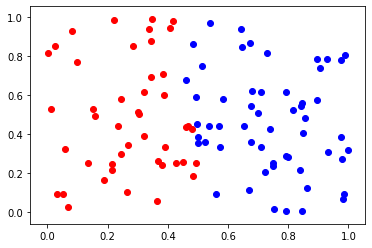

In [3]:
plt.scatter(zeroes.X, zeroes.Y, color = 'red')
plt.scatter(ones.X, ones.Y, color = 'blue')
plt.show()

In [4]:
target_column = ['Result']
predictors = list(set(list(df.columns)) - set(target_column))
X = df[predictors]
Y = df['Result']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
print(X_train.shape) 
print(X_test.shape)

(80, 2)
(20, 2)


In [22]:
def step(x):
    if x > 0.5:
        return 1
    else:
        return 0
    
Y_train = np.array(Y_train)
X_train = np.array(X_train)

Y_test = np.array(Y_test)
X_test = np.array(X_test)

weights = np.random.rand(2,1)
print("Initial weights: ")
print(weights)

eta = 1

outputs = np.zeros(80)
yi = 0

err = 1

while err > 0.3:
    l = []
    output = []
    for i in range(len(X_train)):
        yi = step(np.dot(X_train[i], weights))
        output.append(step(yi))
        
        weights_old = weights
        
        if Y_train[i]*yi <= 0:
            weights[0] = weights[0] + np.dot(X_train[i][0], Y_train[i])
            weights[1] = weights[1] + np.dot(X_train[i][1], Y_train[i])
            
        a = abs(Y_train[i] - step(yi))
        

        if a == 1:
            l.append(a)
    err = len(l)/len(X_train)
    
    if (abs(weights_old - weights).all() < 0.001):
        break
    
print("Received weights: ")
print(weights)

c = []
Yi = []
for j in range(len(Y_test)):
    y_test = step(np.dot(X_test[j], weights))
    Yi.append(y_test)
    b = abs(Y_test[j] - y_test)
    if b == 1:
        c.append(b)
err_y = len(c)/len(Y_test)

Initial weights: 
[[0.53014363]
 [0.51761142]]
Received weights: 
[[0.53914363]
 [1.36361142]]


In [23]:
print("Err1: ")
print(err)

print("Err2: ")
print(err_y)

Err1: 
0.2875
Err2: 
0.2


In [24]:
Yi = np.array(Yi)

In [25]:
df03 = pd.DataFrame({'Actual':Y_test, 'Predicted': Yi.T})
df03

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,0,1
8,0,0
9,1,1
